In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import folium

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
hotels = pd.read_csv('/content/gdrive/MyDrive/tourism_dataset_south_india.csv')

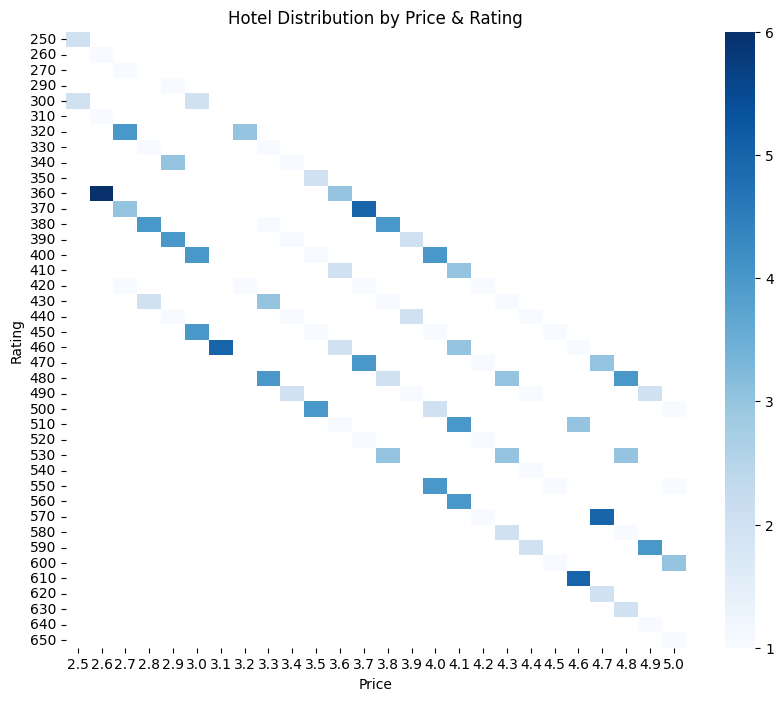

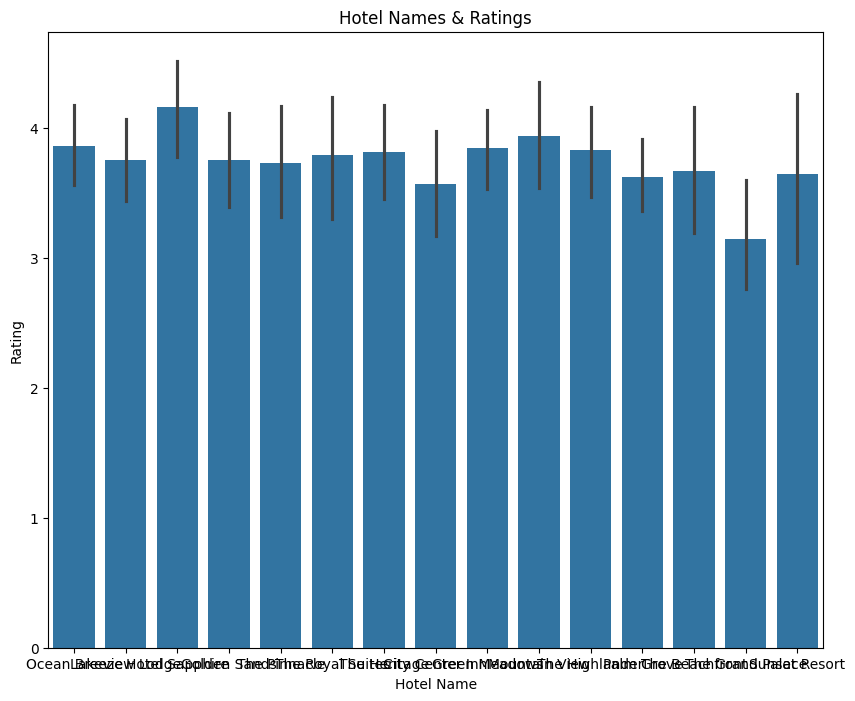

In [ ]:
# Heatmap to show distribution of Hotels by Price & Rating
plt.figure(figsize=(10,8))
sns.heatmap(hotels.groupby(['price','rating']).size().unstack(),cmap='Blues')
plt.title('Hotel Distribution by Price & Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Bar graph to analyse Ratings and Names of Hotels
plt.figure(figsize=(10,8))
sns.barplot(x='hotel_name',y='rating',data=hotels)
plt.title('Hotel Names & Ratings')
plt.xlabel('Hotel Name')
plt.ylabel('Rating')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# True Labels
true_labels = ['Ocean Breeze', 'Mountain View', 'Green Meadows', 'The Beachfront', 'Lakeview Lodge', 'The Heritage', 'The Royal Suites', 'Golden Sands', 'Palm Grove', 'The Highlander', 'Golden Sands', 'The Pinnacle', 'The Highlander', 'The Heritage']

# Predicted Labels
predicted_labels = ['Ocean Breeze', 'Mountain View', 'Green Meadows', 'The Beachfront', 'Lakeview Lodge', 'The Heritage', 'The Royal Suites', 'Golden Sands', 'Palm Grove', 'The Highlander', 'Golden Sands', 'The Pinnacle', 'The Highlander', 'The Heritage']

# Confusion Matrix
cm = confusion_matrix(true_labels,predicted_labels)
print("Confusion Matrix: ")
print(cm)

# Accuracy
accuracy = accuracy_score(true_labels,predicted_labels)
print("Accuracy: ",accuracy)

# Classification Report
report = classification_report(true_labels, predicted_labels)
print("Classification Report: ")
print(report)

Confusion Matrix: 
[[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]]
Accuracy:  1.0
Classification Report: 
                  precision    recall  f1-score   support

    Golden Sands       1.00      1.00      1.00         2
   Green Meadows       1.00      1.00      1.00         1
  Lakeview Lodge       1.00      1.00      1.00         1
   Mountain View       1.00      1.00      1.00         1
    Ocean Breeze       1.00      1.00      1.00         1
      Palm Grove       1.00      1.00      1.00         1
  The Beachfront       1.00      1.00      1.00         1
    The Heritage       1.00      1.00      1.00         2
  The Highlander       1.00      1.00      1.00         2
    The Pinnacle       1.00      1.00      1.00         1
The Royal Suites       1.00

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


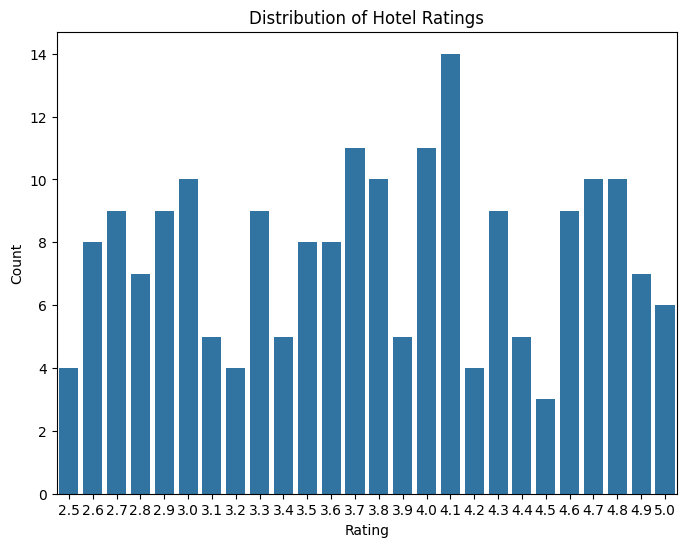

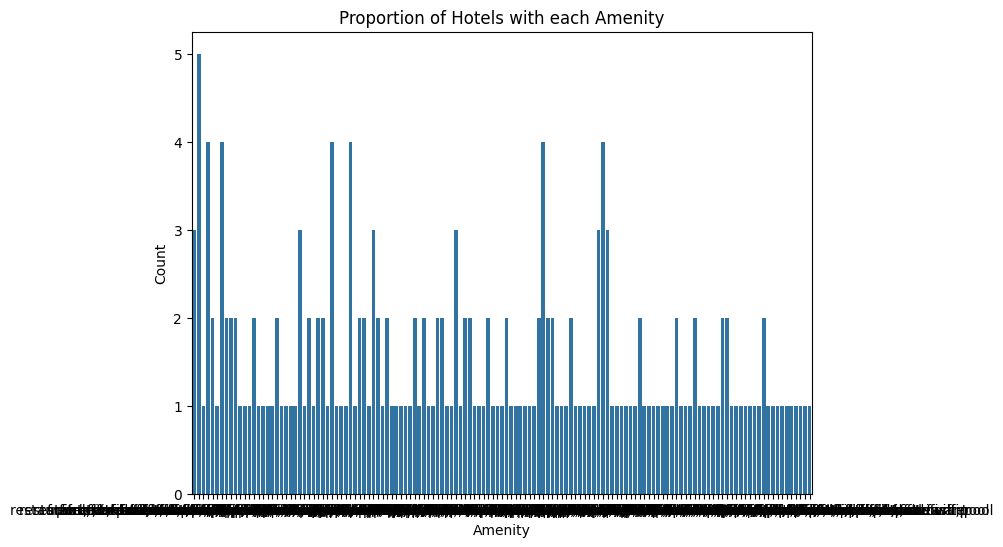

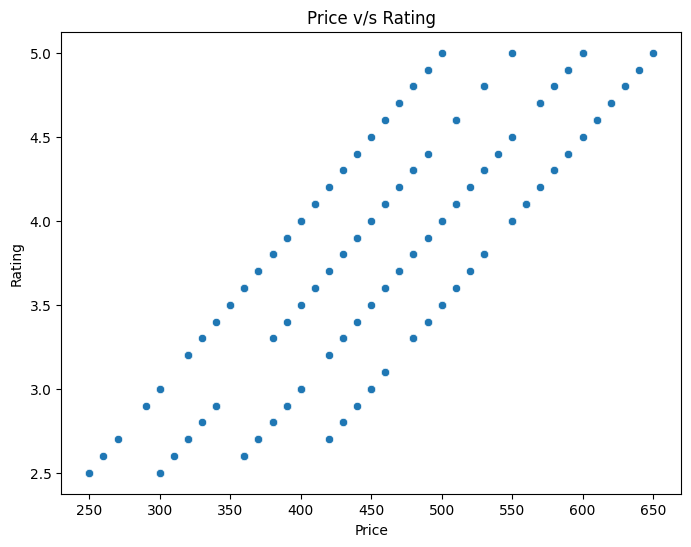

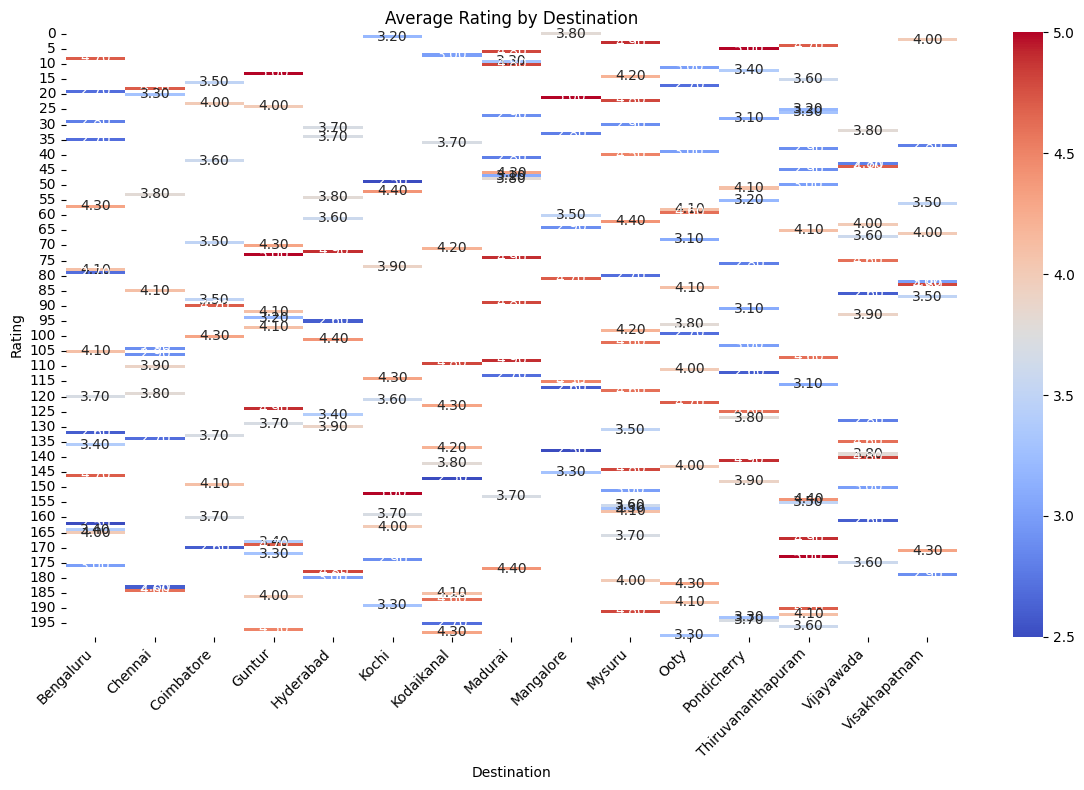

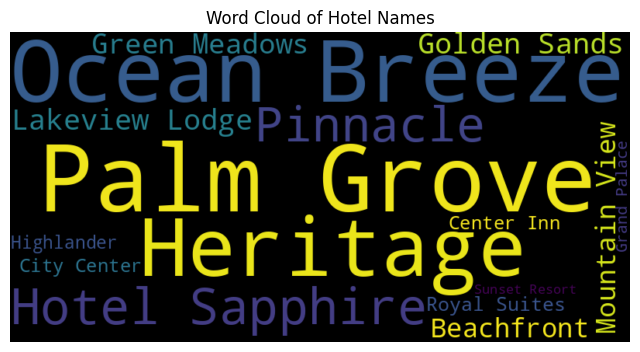

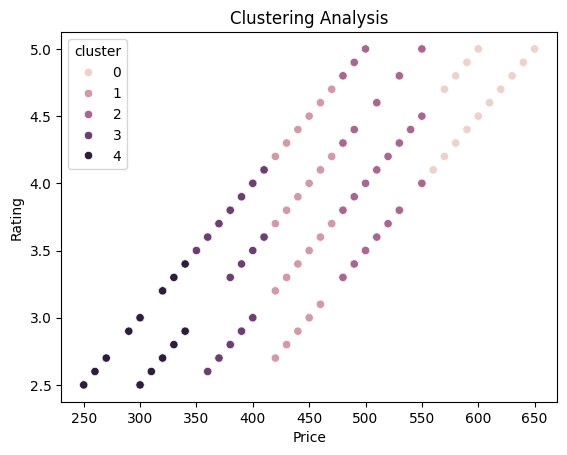

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

hotels = pd.read_csv('/content/gdrive/MyDrive/tourism_dataset_south_india.csv')

# Bar graph of Hotel Ratings
plt.figure(figsize=(8,6))
sns.countplot(x="rating",data=hotels)  # Use 'hotels' instead of 'data'
plt.title("Distribution of Hotel Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Pie chart of Amenities
plt.figure(figsize=(8,6))
sns.countplot(x="amenities",data=hotels)  # Use 'hotels' instead of 'data'
plt.title("Proportion of Hotels with each Amenity")
plt.xlabel("Amenity")
plt.ylabel("Count")
plt.show()

# Scatter plot of Price v/s Rating
plt.figure(figsize=(8,6))
sns.scatterplot(x="price",y="rating",data=hotels)  # Use 'hotels' instead of 'data'
plt.title("Price v/s Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

# Heatmap of Average Rating by Destination
plt.figure(figsize=(12,8))  # Increase figure size for better readability

# Calculate average rating by destination using pivot_table
heatmap_data = hotels.pivot_table(values='rating',index=hotels.index,columns='destination',aggfunc='mean')

sns.heatmap(heatmap_data,annot=True,cmap="coolwarm",fmt=".2f")  # Display heatmap with annotations
plt.title("Average Rating by Destination")
plt.xlabel("Destination")
plt.ylabel("Rating")
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Word Cloud of Hotel Names
from wordcloud import WordCloud
plt.figure(figsize=(8,6))
# Access the 'hotel_name' column instead of 'name'
wordcloud = WordCloud(width=800,height=400).generate(" ".join(hotels["hotel_name"]))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Hotel Names")
plt.show()

# Clustering Analysis
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

# Fit the encoder to the 'amenities' column and transform it
amenities_encoded = encoder.fit_transform(hotels[['amenities']])

# Create a DataFrame from the encoded amenities
amenities_df = pd.DataFrame(amenities_encoded,columns=encoder.get_feature_names_out(['amenities']))

# Concatenate the encoded amenities with the original DataFrame
hotels_encoded = pd.concat([hotels,amenities_df],axis=1)

# Select the features for clustering, including the encoded amenities
features_for_clustering = ['price','rating'] + list(encoder.get_feature_names_out(['amenities']))

kmeans = KMeans(n_clusters=5)
# Fit KMeans to the selected features, including the encoded amenities
hotels["cluster"] = kmeans.fit_predict(hotels_encoded[features_for_clustering])
sns.scatterplot(x="price",y="rating",hue="cluster",data=hotels)
plt.title("Clustering Analysis")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()